<a href="https://colab.research.google.com/github/CodeReaper9000/Book-Recommendation-System/blob/main/recommendation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recommendation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
book_csv = '/content/drive/My Drive/BookDataset/Books.csv'
ratings_csv = '/content/drive/My Drive/BookDataset/Ratings.csv'
users_csv = '/content/drive/My Drive/BookDataset/Users.csv'

In [ ]:
book = pd.read_csv(book_csv)
ratings = pd.read_csv(ratings_csv)
users = pd.read_csv(users_csv)

<ipython-input-4-8fa2c7d6dd4a>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv(book_csv)


#Cleaning

In [ ]:
print(book.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


Book

In [ ]:
book.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
book.rename(columns =
 {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher', "Image-URL-S":"image_url"},
            inplace=True)
book.head(2)

,ISBN,title,author,year,publisher,image_url,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [ ]:
book.drop(columns=['Image-URL-M','Image-URL-L'],inplace=True)

In [ ]:
book.isnull().sum()

,0
ISBN,0
title,0
author,2
year,0
publisher,2
image_url,0


In [ ]:
book.dropna(inplace=True)

In [ ]:
book.shape

(271356, 6)

Ratings

In [ ]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [ ]:
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)
ratings.head(2)

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5


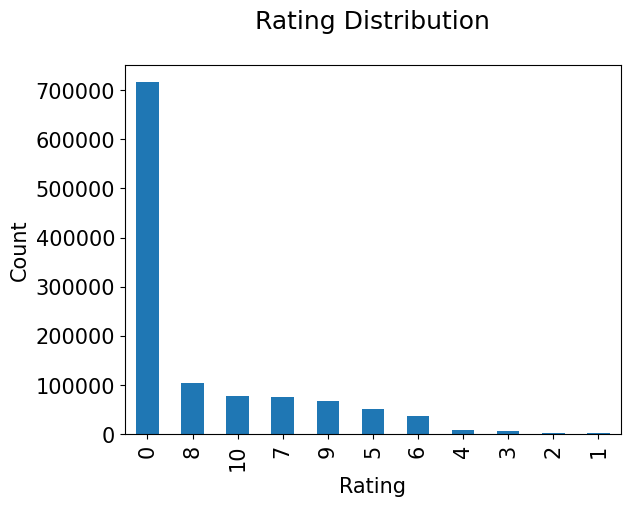

In [ ]:
plt.rc("font", size=15)
ratings.rating.value_counts(sort=True).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
ratings.isnull().sum()

,0
user_id,0
ISBN,0
rating,0


Users

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


#Merging

Gettings user with ratings > 150

In [ ]:
ratings['user_id'].value_counts()

,count
user_id,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


In [ ]:
x = ratings['user_id'].value_counts() > 150

In [ ]:
x[x].shape  #only true are taken

(1223,)

In [ ]:
y = x[x].index

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]
print(ratings.shape)
print(ratings.head(2))

(582644, 3)
      user_id        ISBN  rating
1456   277427  002542730X      10
1457   277427  0026217457       0


In [ ]:
book_ratings = ratings.merge(book, on='ISBN')
print(book_ratings.shape)
print(book_ratings.head(2))

(539227, 10)
   user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1                 Vegetarian Times Complete Cookbook         Lucy  Moll  1995   

                   publisher  \
0  John Wiley &amp; Sons Inc   
1      John Wiley &amp; Sons   

                                           image_url  \
0  http://images.amazon.com/images/P/002542730X.0...   
1  http://images.amazon.com/images/P/0026217457.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/002542730X.0...   
1  http://images.amazon.com/images/P/0026217457.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/002542730X.0...  
1  http://images.amazon.com/images/P/0026217457.0...  


In [ ]:
num_rating = book_ratings.groupby('title')['rating'].count().reset_index()
num_rating.rename(columns = {'rating':'num_of_rating'}, inplace=True)
num_rating.head(2)

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1


In [ ]:
final_rating = book_ratings.merge(num_rating, on='title')
print(final_rating.shape)
print(final_rating.head(2))

(539227, 11)
   user_id        ISBN  rating  \
0   277427  002542730X      10   
1   277427  0026217457       0   

                                               title             author  year  \
0  Politically Correct Bedtime Stories: Modern Ta...  James Finn Garner  1994   
1                 Vegetarian Times Complete Cookbook         Lucy  Moll  1995   

                   publisher  \
0  John Wiley &amp; Sons Inc   
1      John Wiley &amp; Sons   

                                           image_url  \
0  http://images.amazon.com/images/P/002542730X.0...   
1  http://images.amazon.com/images/P/0026217457.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/002542730X.0...   
1  http://images.amazon.com/images/P/0026217457.0...   

                                         Image-URL-L  num_of_rating  
0  http://images.amazon.com/images/P/002542730X.0...             88  
1  http://images.amazon.com/images/P/0026217457.0...             

In [ ]:
final_rating = final_rating[final_rating['num_of_rating'] >= 50]
print(final_rating.shape)
print(final_rating.head(2))

(77580, 11)
    user_id        ISBN  rating  \
0    277427  002542730X      10   
13   277427  0060930535       0   

                                                title              author  \
0   Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
13                      The Poisonwood Bible: A Novel  Barbara Kingsolver   

    year                  publisher  \
0   1994  John Wiley &amp; Sons Inc   
13  1999                  Perennial   

                                            image_url  \
0   http://images.amazon.com/images/P/002542730X.0...   
13  http://images.amazon.com/images/P/0060930535.0...   

                                          Image-URL-M  \
0   http://images.amazon.com/images/P/002542730X.0...   
13  http://images.amazon.com/images/P/0060930535.0...   

                                          Image-URL-L  num_of_rating  
0   http://images.amazon.com/images/P/002542730X.0...             88  
13  http://images.amazon.com/images/P/00609305

#Pivot Table

In [ ]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")
book_pivot.fillna(0, inplace=True)
book_pivot

user_id,254,1733,1903,2033,2110,2276,2766,2891,2977,3363,...,274308,274808,275970,276018,276680,277427,277478,277639,278188,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [ ]:
book_sparse

<884x1206 sparse matrix of type '<class 'numpy.float64'>'
	with 19883 stored elements in Compressed Sparse Row format>

#KNN Implementation

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
distance, suggestion = model.kneighbors(book_pivot.iloc[123, :].values.reshape(1, -1), n_neighbors=6)

In [ ]:
print(distance)
print(suggestion)

[[ 0.         29.26174978 29.55080371 29.80352328 30.67979791 30.89498341]]
[[123  37 270 793 527 457]]


In [ ]:
for i in range(len(suggestion)):
  print(book_pivot.index[suggestion[i]])

Index(['Certain Prey', 'Abduction', 'Ground Zero and Beyond',
       'The Undertaker's Widow', 'Shadow Prey', 'Personal Injuries'],
      dtype='object', name='title')


In [ ]:
book_names = book_pivot.index

#Pickle file

In [ ]:
import pickle

data_to_save = {
    'model': model,
    'book_names': book_names,
    'final_rating': final_rating,
    'book_pivot': book_pivot
}

# Save the dictionary to a pickle file
with open('recommendation_data.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)

#Testing

In [ ]:
def recommend(book_name):
  book_id = np.where(book_pivot.index == book_name)[0][0]
  distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

  for i in range(len(suggestion)):
    b_name = book_pivot.index[suggestion[i]]
    for j in b_name:
      print(j)

In [ ]:
book_name = 'The Da Vinci Code'
recommend(book_name)

The Da Vinci Code
TickTock
The Blue Nowhere : A Novel
Touching Evil
Oldest Living Confederate Widow Tells All
Zoya


In [ ]:
book_name = 'Harry Potter and the Chamber of Secrets (Book 2)'
recommend(book_name)

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Jacob Have I Loved
Exclusive
